In [2]:
import skimage  #scikit image
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

## 图像处理  (scikit Image)


图像处理中的常见任务包括显示图像，基本操作（如裁剪、翻转、旋转等），图像分割，分类和特征提取，图像恢复和图像识别等。  
Python是图像处理任务的最佳选择，是因为这一科学编程语言日益普及，并且其自身免费提供许多最先进的图像处理工具。

让我们看一下用于图像处理任务的一些常用Python库。

### scikit Image

`scikit-image`是一个基于`numpy`数组的开源Python包。它实现了用于研究、教育和工业应用的算法和实用程序。  
即使是对于那些刚接触Python的人，它也是一个相当简单的库。 此库代码质量非常高并已经过同行评审，是由一个活跃的志愿者社区编写的。

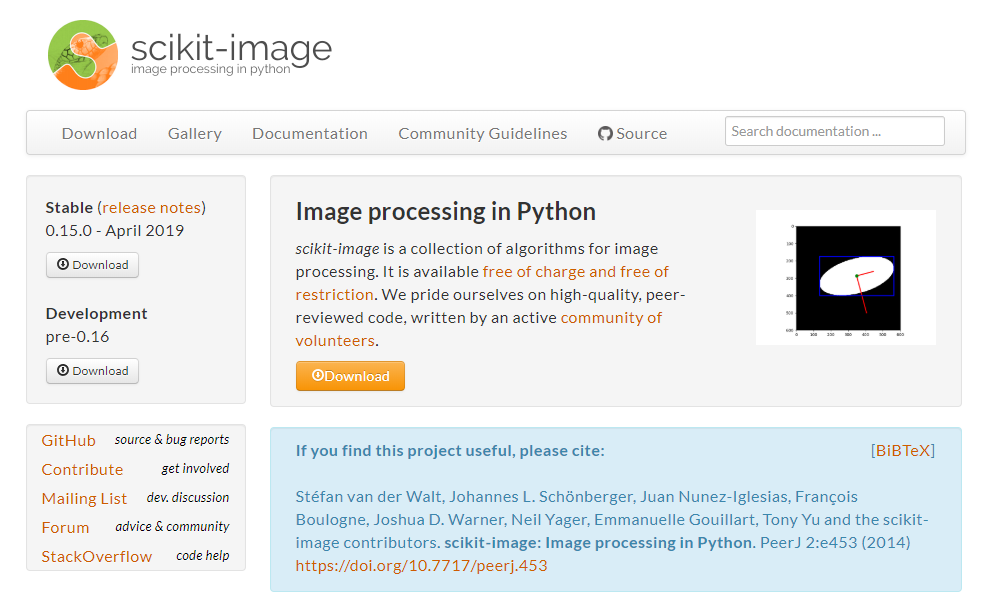

[使用说明文档](https://scikit-image.org/docs/stable/user_guide.html)  
[Github仓库](https://github.com/scikit-image/scikit-image)

### 安装Scikit Image

从pip安装:

> pip install scikit-image

卸载：

> pip uninstall scikit-image


从Conda或者miniconda安装

> conda install -c conda-forge scikit-image

从Conda或者miniconda卸载
> conda uninstall scikit-image

### 初探scikit image
#### 导入 scikit image

In [1]:
import skimage  #scikit image
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

#### 读入scikit image示例图片

- 使用scikit image的实例图片。 相关图片包含在 skimage.data模块中。

In [3]:
camera = data.camera()
coins = data.coins()

- scikit Image 读入的图像，是numpy.ndarray格式。
    - 对于单色图像，是`[m,n]` ndarray
    - 对于RGB色彩图像，是`[m,n,3]` ndarray

In [7]:
print(type(camera))
print(camera.shape)
print(type(coins))
print(coins.shape)

<class 'numpy.ndarray'>
(512, 512)
<class 'numpy.ndarray'>
(303, 384)


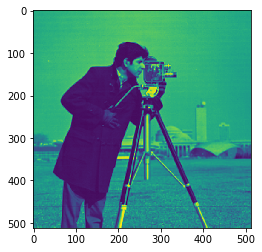

In [8]:
plt.imshow(camera)

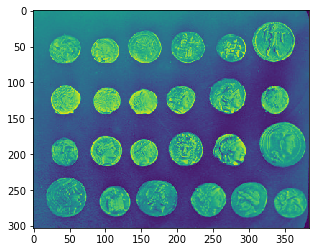

In [9]:
plt.imshow(coins)

#### 使用scikit image读入本地图片

- 当然scikit image也能读取本地的图片

In [16]:
skimage.data_dir

'/srv/conda/envs/notebook/lib/python3.7/site-packages/skimage/data'

In [17]:
!ls /srv/conda/envs/notebook/lib/python3.7/site-packages/skimage/data

astronaut_GRAY_hog_L1.npy      green_palette.png
astronaut_GRAY_hog_L2-Hys.npy  horse.png
astronaut.png		       hubble_deep_field.jpg
_binary_blobs.py	       ihc.png
_blobs_3d_fiji_skeleton.tif    __init__.py
block.png		       lbpcascade_frontalface_opencv.xml
brick.png		       lfw_subset.npy
bw_text.png		       logo.png
bw_text_skeleton.npy	       microaneurysms.png
camera.png		       moon.png
cells_qpi.npz		       motorcycle_disp.npz
cells_qpi_zipped.zip	       motorcycle_left.png
checker_bilevel.png	       motorcycle_right.png
chelsea.png		       mssim_matlab_output.npz
chessboard_GRAY.png	       multi.fits
chessboard_GRAY_U16B.tif       multipage_rgb.tif
chessboard_GRAY_U16.tif        multipage.tif
chessboard_GRAY_U8.npy	       no_time_for_that_tiny.gif
chessboard_GRAY_U8.npz	       orb_descriptor_positions.txt
chessboard_RGB.png	       page.png
chessboard_RGB_U8.npy	       palette_color.png
chessboard_RGB_U8.npz	       palette_gray.png
clock_motion.png	       phantom.png
coffee.pn

(500, 500, 4)


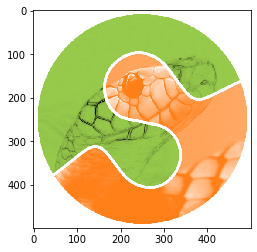

In [19]:
import os
from skimage import io

filename = os.path.join(skimage.data_dir, 'logo.png')
logo = io.imread(filename)
print(logo.shape)
plt.imshow(logo)

### Scikit Image Crash Course速成课

通过Scikit Image 读入的图像，是`[m,n,[A]]`的numpy.ndarray， 自然就可以根据ndarray的功能去操纵图片。

<class 'numpy.ndarray'>
(512, 512)
262144


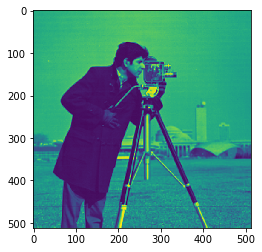

In [31]:
camera = data.camera()
print(type(camera))
print(camera.shape)
print(camera.size)
plt.imshow(camera)

#### Index with numpy image

In [34]:
camera[100:200,100:200] = camera[100:200,100:200] + 50

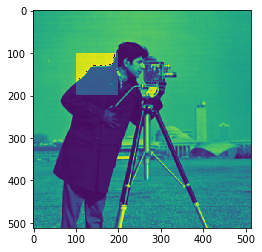

In [35]:
plt.imshow(camera)

#### Index and mask with numpy index

In [64]:
camera2 = data.camera()
mask = camera2 > 200

In [65]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [66]:
camera2[mask] = camera2[mask] - 100

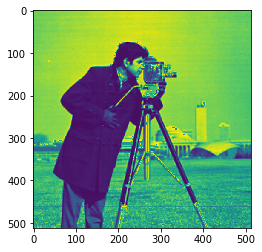

In [67]:
plt.imshow(camera2)

- Fancy index

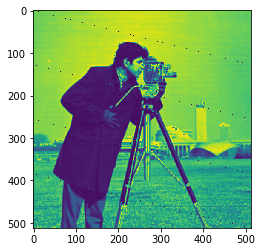

In [63]:
inds_r = np.arange(len(camera2))
inds_c = 4 * inds_r % len(camera2)
camera2[inds_r, inds_c] = 0
plt.imshow(camera2)

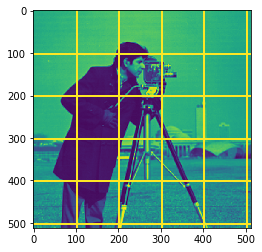

In [74]:
camera3 = data.camera()
camera3[100:105 ,:] = 255
camera3[200:205 ,:] = 255
camera3[300:305 ,:] = 255
camera3[400:405 ,:] = 255
camera3[500:505 ,:] = 255
camera3[:,100:105] = 255
camera3[:,200:205] = 255
camera3[:,300:305] = 255
camera3[:,400:405] = 255
camera3[:,500:505] = 255
plt.imshow(camera3)

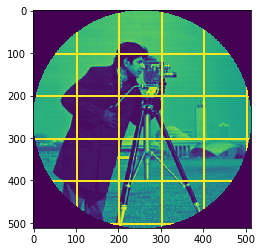

In [75]:
nrows, ncols = camera3.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera3[outer_disk_mask] = 0
plt.imshow(camera3)

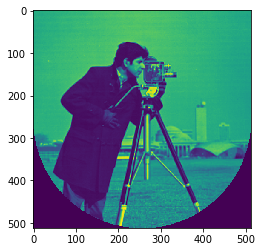

In [77]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera4 = data.camera()
camera4[lower_half_disk] = 0
plt.imshow(camera4)

#### 彩色图像color image

<class 'numpy.ndarray'>
(300, 451, 3)


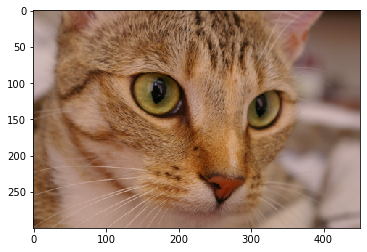

In [4]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)

<class 'numpy.ndarray'>
(300, 451, 3)


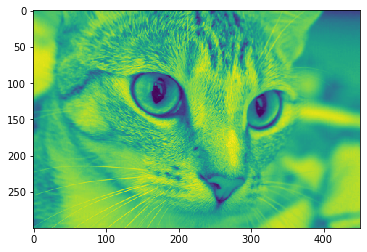

In [5]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat[:,:,0])

#### Coordinate conventions坐标转换

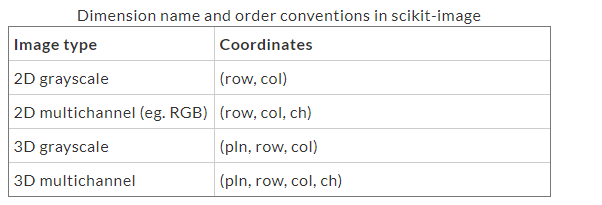

In [3]:
#im3d = np.random.rand(100, 1000, 1000)
#from skimage import morphology
#from scipy import ndimage as ndi
#seeds = ndi.label(im3d < 0.1)[0]
#ws = morphology.watershed(im3d, seeds)

In [5]:
import numpy as np
np.arange?